In [1]:
%pip install numpy pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: numpy in c:\users\kiit0001\anaconda3\lib\site-packages (1.26.4)



In [2]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


### What Does It Tell Us?
High cost: Your model's predictions are far from the actual values (bad performance).

Low cost: Predictions are very close to actual values (good performance).

During training, you want to minimize the cost function.

In [3]:
from sklearn.datasets import make_regression

import numpy as np
import matplotlib.pyplot as plt

In [4]:
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

 What does make_regression() do?
make_regression is a utility function from scikit-learn that generates synthetic data for regression problems. It returns:

X: the input features (independent variables)

y: the target values (dependent variable)

This is useful for testing models when you don’t have real data.

📊 What each parameter means:
Parameter	Value	Meaning
n_samples=100	100	Generate 100 data points (rows)
n_features=1	1	Each sample has 1 feature (1 input variable, so X shape = (100, 1))
n_informative=1	1	The number of informative features (i.e., features that affect y)
n_targets=1	1	Only 1 output variable y
noise=20	20	Adds Gaussian noise with std deviation 20 to the output y
random_state=13	13	Ensures reproducibility — same random numbers every time

📈 What’s happening behind the scenes?
It generates 100 X values (features) — shape: (100, 1)

Creates y using a linear model:

𝑦
=
𝑋
𝑤
+
noise
y=Xw+noise
Where:

w is a random weight (coefficient)

Noise is Gaussian (normal) noise added to make it realistic

The result is a linear relationship with randomness, perfect for testing linear regression.



In [5]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

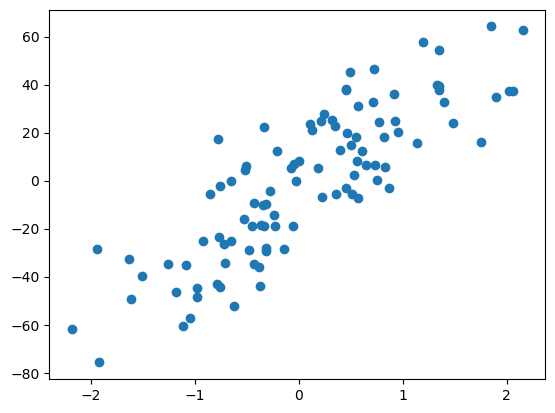

In [6]:
plt.scatter(X,y)

Scikit-learn (often abbreviated as sklearn) is a free and open-source machine learning library for the Python programming language.

It's one of the most widely used and popular libraries in the field of machine learning and data science due to its:

Comprehensive Range of Algorithms: It provides a vast collection of machine learning algorithms for various tasks, including:

Classification: For categorizing data into discrete classes (e.g., spam detection, image recognition). Examples: Logistic Regression, Support Vector Machines (SVMs), Decision Trees, Random Forests, K-Nearest Neighbors (KNN), Naive Bayes.

Regression: For predicting continuous numerical values (e.g., house price prediction, stock price forecasting). Examples: Linear Regression, Ridge Regression, Lasso Regression, Support Vector Regression.

Clustering: For grouping similar data points together without prior labels (unsupervised learning) (e.g., customer segmentation). Examples: K-Means, DBSCAN, Hierarchical Clustering.

Dimensionality Reduction: For reducing the number of features in a dataset while retaining important information (e.g., for visualization or efficiency). Examples: Principal Component Analysis (PCA).

Model Selection and Evaluation: Tools for choosing the best model and hyperparameters, and assessing model performance (e.g., cross-validation, grid search, various metrics like accuracy, precision, recall, MSE).

Preprocessing: Utilities for preparing data before feeding it to machine learning models (e.g., scaling, handling missing values, encoding categorical data).

Consistent API: One of its strongest features is its consistent and intuitive API (Application Programming Interface). Most models in scikit-learn follow a standard fit(), predict(), and transform() pattern, making it easy to learn and switch between different algorithms.

Built on Numerical Python Libraries: It's built on top of other fundamental Python libraries for scientific computing, namely:

NumPy: For efficient numerical operations and array manipulation.

SciPy: For scientific and technical computing.

Matplotlib: For data visualization (though scikit-learn doesn't directly plot, it integrates well with Matplotlib for visualizing results).

Ease of Use: Scikit-learn is designed to be user-friendly, allowing both beginners and experienced practitioners to implement machine learning models with just a few lines of code.

In [7]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

[27.82809103]
-2.29474455867698


# Step by Step

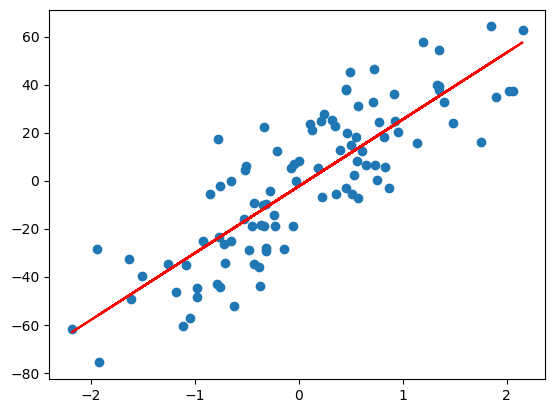

In [8]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red')

In [9]:
# Lets apply Gradient Descent assuming slope is constant m = 78.35
# and let's assume the starting value for intercept b = 0
y_pred = ((78.35 * X) + 100)

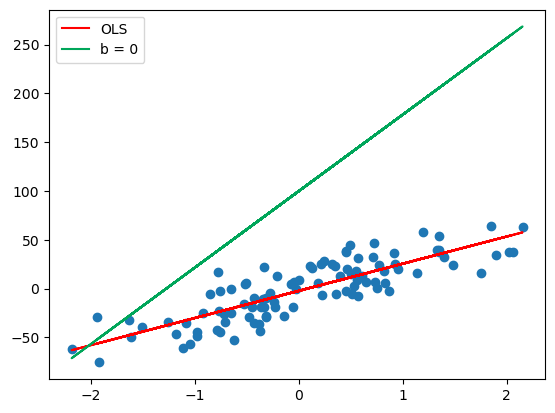

In [10]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='#00a65a',label='b = 0')
plt.legend()
plt.show()

In [11]:
m = 78.35
b = 100

loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

21049.119491445497

In [12]:
lr = 0.1

step_size = loss_slope*lr
step_size

2104.91194914455

In [13]:
# Calculating the new intercept
b = b - step_size
b

-2004.91194914455

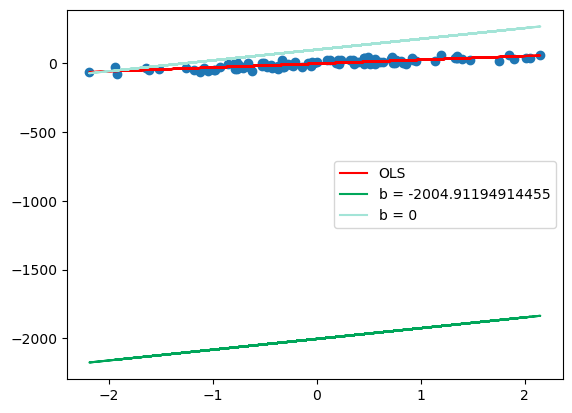

In [14]:
y_pred1 = ((78.35 * X) + b)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred1,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

In [15]:
# Iteration 2
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

-399933.27033746446

In [16]:
step_size = loss_slope*lr
step_size

-39993.32703374645

In [17]:
b = b - step_size
b

37988.4150846019

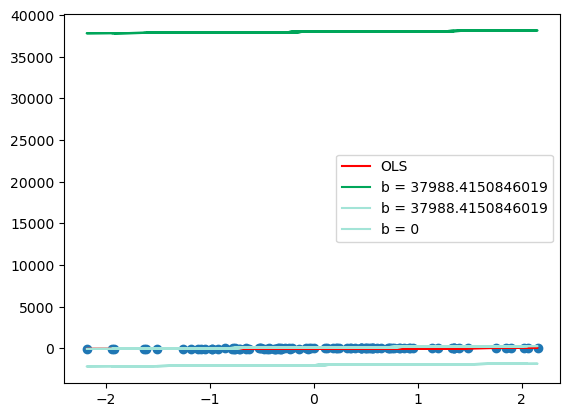

In [18]:
y_pred2 = ((78.35 * X) + b)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred2,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

In [19]:
# Iteration 3
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

7598732.136411824

In [20]:
step_size = loss_slope*lr
step_size

759873.2136411825

In [21]:
b = b - step_size
b

-721884.7985565807

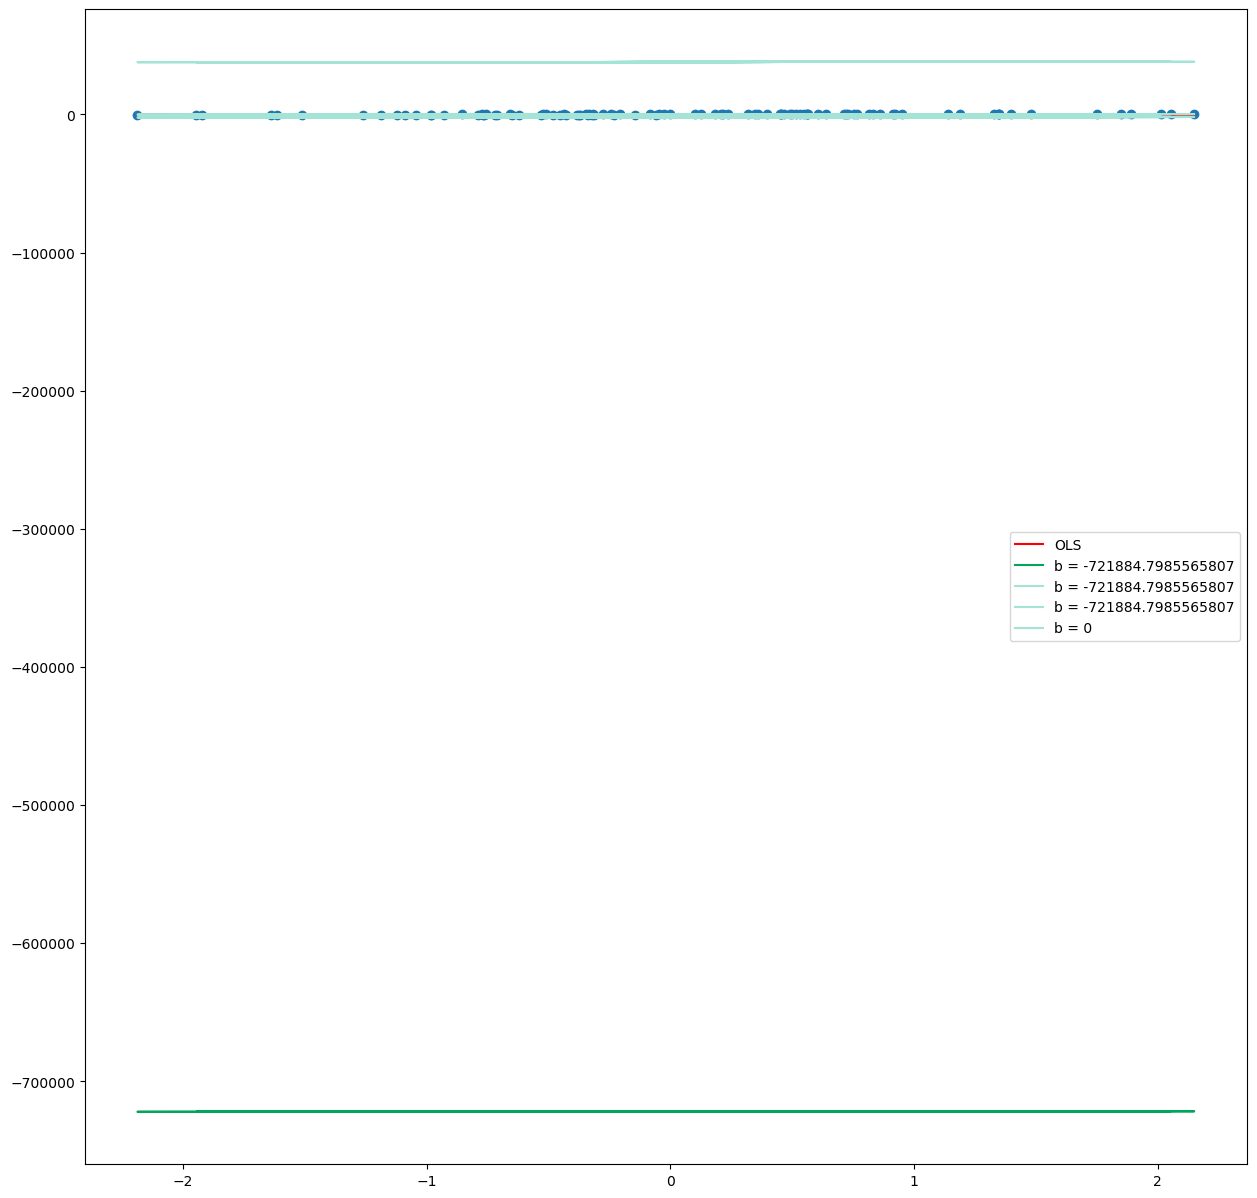

In [22]:
y_pred3 = ((78.35 * X) + b)

plt.figure(figsize=(15,15))
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred3,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred2,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

During a single epoch:

The machine learning model (e.g., a neural network) will process all 1000 training examples once.

For each example (or a small batch of examples), the model makes a prediction, calculates the error (loss) between its prediction and the actual target, and then updates its internal parameters (weights and biases) based on this error using an optimization algorithm (like backpropagation for neural networks, which is an application of gradient descent).

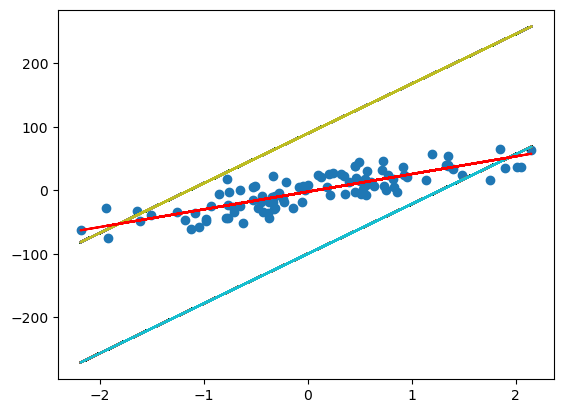

In [23]:
b = -100
m = 78.35
lr = 0.01

epochs = 3000

for i in range(epochs):
  loss_slope = -2 * np.sum(y - m*X.ravel() - b)
  b = b - (lr * loss_slope)

  y_pred = m * X + b

  plt.plot(X,y_pred)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')

# **Only** B Varies

Here's a detailed explanation of the code and plot:

---

### **Objective:**

We're using **gradient descent** to iteratively update the **intercept $b$** of a linear regression model $y = mX + b$, while keeping the slope $m$ constant.

---

### **Key Variables:**

* `X`: Input features.
* `y`: Target values.
* `m`: Slope (fixed at 27.82).
* `b`: Intercept (initially -150).
* `lr`: Learning rate (0.001).
* `epochs`: Number of iterations for updating `b`.

---

### **Gradient Descent Loop Explanation:**

For each epoch:

1. **Compute the gradient of loss w\.r.t. `b`:**

   $$
   \text{slope} = -2 \sum (y_i - (m \cdot X_i + b))
   $$

2. **Compute the cost (sum of squared errors):**

   $$
   \text{cost} = \sum (y_i - (m \cdot X_i + b))^2
   $$

3. **Update intercept `b`:**

   $$
   b = b - \text{lr} \cdot \text{slope}
   $$

4. **Save updated values for plotting.**

---

### **Plot:**

* The **black dots** are the original data points.
* The **blue lines** represent regression lines across epochs — as `b` changes, the line shifts vertically.
* The **red line** is the final regression line after all 30 epochs.

---

Let me know if you'd like to extend this to update both `m` and `b` (full gradient descent) or visualize the cost over epochs!

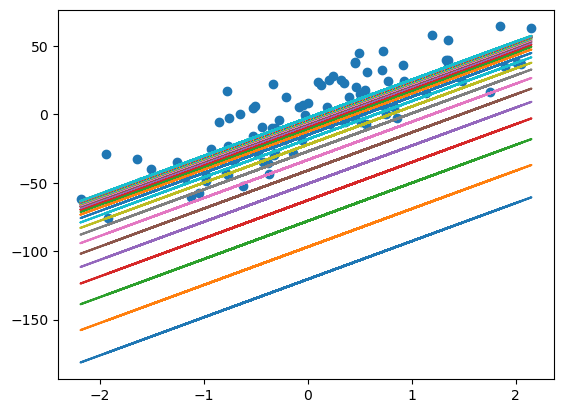

In [24]:
b = -150
m = 27.82
lr = 0.001
all_b = []
all_cost = []

epochs = 30

for i in range(epochs):
    slope = 0
    cost = 0
    for j in range(X.shape[0]):
        slope = slope - 2*(y[j] - (m * X[j]) -  b)
        cost = cost + (y[j] - m * X[j] -b) ** 2

    b = b - (lr * slope)
    all_b.append(b)
    all_cost.append(cost)
    y_pred = m * X + b
    plt.plot(X,y_pred)
plt.scatter(X,y)

Great question!

```python
all_b = np.array(all_b).ravel()
```

This line is doing **two things**:

---

### ✅ 1. `np.array(all_b)`

* Converts `all_b` (a Python list of intercept values over each epoch) into a **NumPy array**.
* This is important if you want to:

  * Do fast numerical operations (e.g., plotting, indexing, vector math)
  * Use NumPy functions like `mean`, `std`, or `plot` with matplotlib

---

### ✅ 2. `.ravel()`

* **Flattens** the array to 1D.
* Ensures the resulting array shape is `(n,)` — a plain 1D array.

#### Example:

```python
all_b = [[-145], [-140], [-135]]   # shape = (3, 1)
np.array(all_b).ravel() → [-145, -140, -135]  # shape = (3,)
```

Why flatten?

👉 Some machine learning and plotting libraries (like `matplotlib`, `sklearn`, `pandas`) expect input as **flat 1D vectors**, not nested 2D arrays like `shape = (n,1)`.

---

### 🔁 In short:

This line is just a **clean-up step** to ensure `all_b` is a **NumPy-compatible, flat vector** ready for:

* plotting
* numerical analysis
* further matrix math

---

Let me know if you want a visual of this shape transformation or how it affects plotting.

In [25]:
all_b = np.array(all_b).ravel()

In [26]:
all_b

array([-120.4588544 ,  -96.82593791,  -77.91960473,  -62.79453818,
        -50.69448494,  -41.01444235,  -33.27040827,  -27.07518102,
        -22.11899921,  -18.15405376,  -14.98209741,  -12.44453232,
        -10.41448025,   -8.7904386 ,   -7.49120528,   -6.45181862,
         -5.62030929,   -4.95510183,   -4.42293586,   -3.99720308,
         -3.65661686,   -3.38414789,   -3.16617271,   -2.99179256,
         -2.85228845,   -2.74068515,   -2.65140252,   -2.57997641,
         -2.52283553,   -2.47712282])

In [27]:
all_cost = np.array(all_cost).ravel()
all_cost

array([2210040.49020261, 1424629.13499295,  921965.86765877,
        600261.37656489,  394370.50226481,  262600.34271276,
        178267.44059944,  124294.38324692,   89751.62654131,
         67644.26224972,   53495.5491031 ,   44440.37268926,
         38645.05978441,   34936.0595253 ,   32562.29935947,
         31043.09285334,   30070.80068942,   29448.5337045 ,
         29050.28283416,   28795.40227714,   28632.27872065,
         28527.87964449,   28461.06423575,   28418.30237416,
         28390.93478274,   28373.41952423,   28362.20975879,
         28355.0355089 ,   28350.44398898,   28347.50541622])

Let’s break down this block of code in detail:

---

### 🖼️ `fig, ax = plt.subplots(figsize=(9,5))`

* This **creates a figure (`fig`)** and a set of **axes (`ax`)** for plotting.
* `figsize=(9, 5)` sets the dimensions of the plot to **9 inches wide and 5 inches tall**.

So you're preparing the canvas for plotting your data and the regression line.

---

### 📈 `x_i = np.arange(-3, 3, 0.1)`

* `np.arange(start, stop, step)` generates numbers from `-3` to just below `3` in increments of `0.1`.
* This creates **a smooth range of x-values** which you'll use to draw the regression line.

**Why not use just `X`?**

* Your data `X` likely has a small number of scattered points.
* `x_i` is **continuous**, so it helps draw a **smooth line** across the plot, making the regression line more readable.

---

### ➗ `y_i = x_i * m - 150`

* This applies the **linear equation**:

  $$
  y = m \cdot x + b
  $$

  where:

  * `m = slope = 27.82` (constant in your example)
  * `b = -150` (initial guess)

So you're calculating the y-values for the regression line using the slope `m` and an **initial intercept of -150**.

Result: `y_i` is the corresponding y-values of the regression line at each `x_i`.

---

### 📊 `ax.scatter(X, y)`

* This draws a **scatter plot** of your original data:

  * `X`: input feature values (e.g., height, age)
  * `y`: target/output values (e.g., weight, price)

So this shows your actual data points on the graph.

---

### 🔴 `line, = ax.plot(x_i, x_i*50 - 4, 'r-', linewidth=2)`

* `ax.plot(...)` draws a **line**.
* `x_i*50 - 4` gives initial y-values for the line.
* `'r-'` means a **red line**.
* `linewidth=2` makes the line thicker.

The unusual part here is:

> **Why use `x_i*50 - 4` instead of `y_i` here?**

This is just a **placeholder line**. The real animation will change its position later using:

```python
line.set_ydata(x_i * m + all_b[i])
```

So the red line is **initialized** with a dummy position. Its `y` values will be updated frame-by-frame in the animation.

---

### 🧠 Summary

| Line                  | What it does                                       |
| --------------------- | -------------------------------------------------- |
| `plt.subplots()`      | Creates plotting area                              |
| `np.arange(...)`      | Makes smooth x-points                              |
| `y_i = x_i * m - 150` | Computes line values from initial model            |
| `ax.scatter(...)`     | Plots real data                                    |
| `ax.plot(...)`        | Draws initial red regression line to animate later |

---

Would you like me to help you **replace the dummy red line (`x_i*50 - 4`)** with the actual initial guess (`y_i`)?

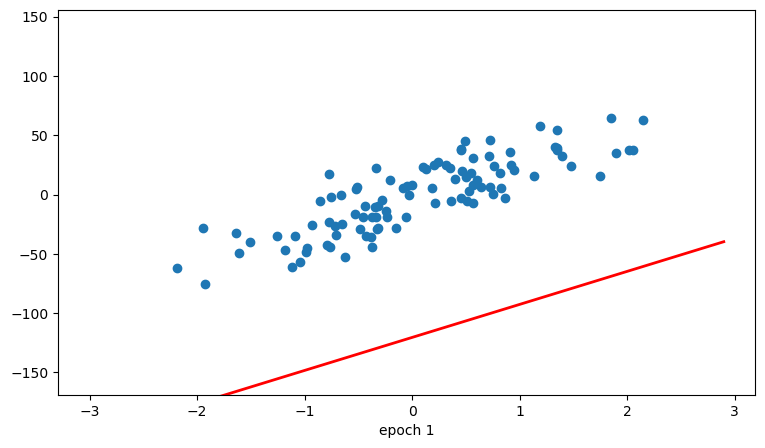

In [28]:
fig, ax = plt.subplots(figsize=(9,5))
#fig.set_tight_layout(True)

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m -150
ax.scatter(X, y)
line, = ax.plot(x_i, x_i*50 - 4, 'r-', linewidth=2)

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m + all_b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=epochs, interval=500)

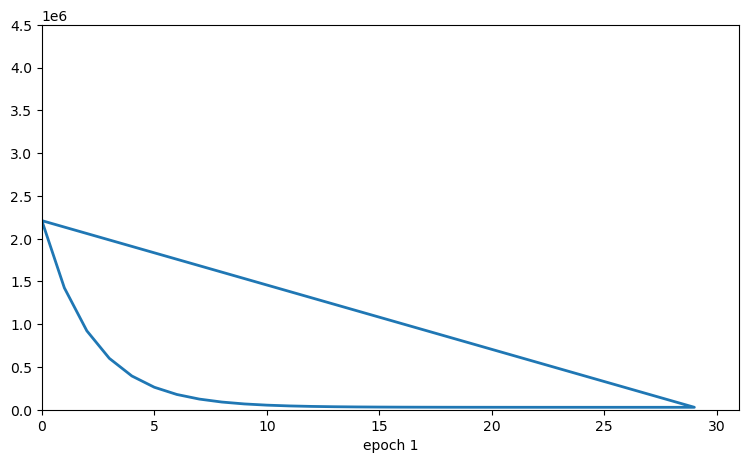

In [29]:
num_epochs = list(range(0,30))
fig = plt.figure(figsize=(9,5)) 
axis = plt.axes(xlim =(0, 31), ylim =(0, 4500000)) 

line, = axis.plot([], [], lw = 2)

xdata, ydata = [], []

# animation function
def animate(i):
    label = 'epoch {0}'.format(i + 1)
    xdata.append(num_epochs[i])
    ydata.append(all_cost[i])
    line.set_data(xdata, ydata)
    axis.set_xlabel(label)

    return line,

# calling the animation function
anim = animation.FuncAnimation(fig, animate, frames = 30,repeat=False, interval = 500)

f = r"animation1.gif"
writergif = animation.PillowWriter(fps=2)
anim.save(f, writer=writergif)

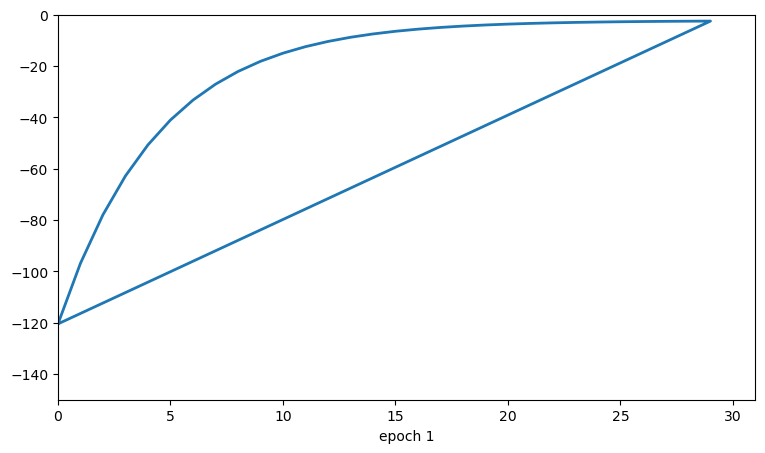

In [30]:
fig = plt.figure(figsize=(9,5))
axis = plt.axes(xlim =(0, 31), ylim =(-150, 0))

line, = axis.plot([], [], lw = 2)

xdata, ydata = [], []

# animation function
def animate(i):
    label = 'epoch {0}'.format(i + 1)
    xdata.append(num_epochs[i])
    ydata.append(all_b[i])
    line.set_data(xdata, ydata)
    axis.set_xlabel(label)

    return line,

# calling the animation function
anim = animation.FuncAnimation(fig, animate, frames = 30,repeat=False, interval = 500)

f = r"animation2.gif"
writergif = animation.PillowWriter(fps=2)
anim.save(f, writer=writergif)

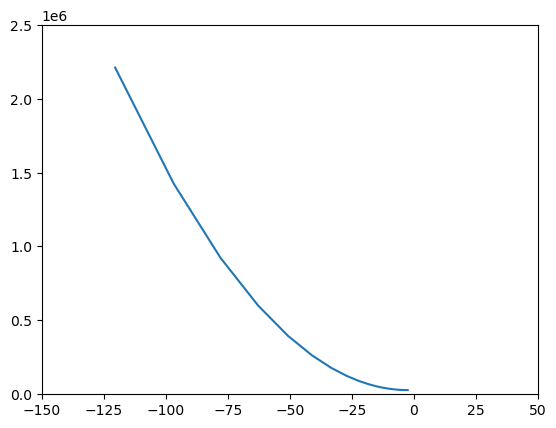

In [31]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

fig, ax = plt.subplots()
ax.plot(all_b, all_cost)
x, y = [],[]
plt.xlim(-150,50)
plt.ylim(0,2500000)

def animate(i):
    label = 'epoch {0}'.format(i + 1)
    x.append(all_b[i])
    y.append(all_cost[i])
    sc.set_offsets(np.c_[x,y])
    ax.set_xlabel(label)

ani = matplotlib.animation.FuncAnimation(fig, animate,
                frames=30, interval=500, repeat=True)
sc = ax.scatter(x,y,color='red',marker='+')
plt.show()

f = r"animation3.gif"
writergif = animation.PillowWriter(fps=2)
ani.save(f, writer=writergif)

In [35]:
b_input = np.linspace(-150,150,100)

In [43]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

In [44]:
cost_input = []

for i in range(len(b_input)):
    this_cost = 0
    for j in range(X.shape[0]):
        this_cost = this_cost + (y[j] - m*X[j] - b_input[i])**2
    #cost_input.append(this_cost)
    print(this_cost)

[2206362.12013656]
[2117847.70761999]
[2031169.84239452]
[1946328.52446014]
[1863323.75381686]
[1782155.53046466]
[1702823.85440356]
[1625328.72563355]
[1549670.14415464]
[1475848.10996681]
[1403862.62307008]
[1333713.68346445]
[1265401.2911499]
[1198925.44612645]
[1134286.14839409]
[1071483.39795282]
[1010517.19480265]
[951387.53894357]
[894094.43037558]
[838637.86909868]
[785017.85511288]
[733234.38841817]
[683287.46901455]
[635177.09690203]
[588903.27208059]
[544465.99455026]
[501865.26431101]
[461101.08136285]
[422173.44570579]
[385082.35733983]
[349827.81626495]
[316409.82248117]
[284828.37598848]
[255083.47678688]
[227175.12487638]
[201103.32025696]
[176868.06292864]
[154469.35289142]
[133907.19014528]
[115181.57469024]
[98292.5065263]
[83239.98565344]
[70024.01207168]
[58644.58578101]
[49101.70678143]
[41395.37507295]
[35525.59065555]
[31492.35352926]
[29295.66369405]
[28935.52114994]
[30411.92589692]
[33724.87793499]
[38874.37726415]
[45860.42388441]
[54683.01779576]
[65342.158

# When m and B Varies

In [37]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

In [38]:
b = -520
m = 600
lr = 0.001
all_b = []
all_m = []
all_cost = []

epochs = 30

for i in range(epochs):
    slope_b = 0
    slope_m = 0
    cost = 0
    for j in range(X.shape[0]):
        slope_b = slope_b - 2*(y[j] - (m * X[j]) -  b)
        slope_m = slope_m - 2*(y[j] - (m * X[j]) -  b)*X[j]
        cost = cost + (y[j] - m * X[j] -b) ** 2

    b = b - (lr * slope_b)
    m = m - (lr * slope_m)
    all_b.append(b)
    all_m.append(m)
    all_cost.append(cost)

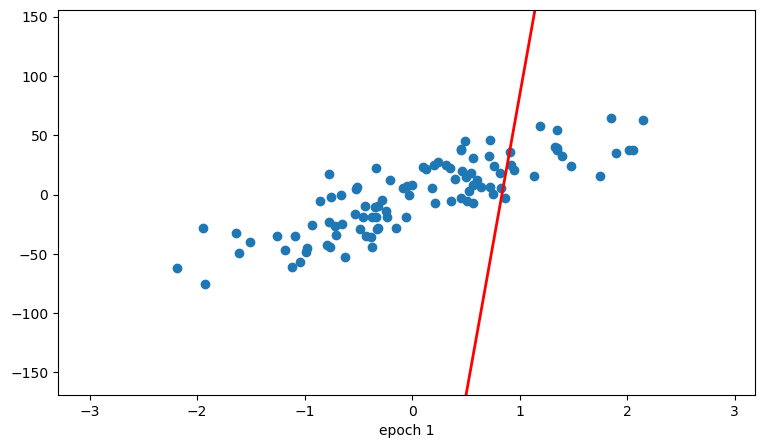

In [39]:
fig, ax = plt.subplots(figsize=(9,5))
#fig.set_tight_layout(True)

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*(-27) -150
ax.scatter(X, y)
line, = ax.plot(x_i, x_i*50 - 4, 'r-', linewidth=2)

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*all_m[i] + all_b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=epochs, interval=500)

#f = r"animation4.gif" 
#writergif = animation.PillowWriter(fps=2) 
#anim.save(f, writer=writergif)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


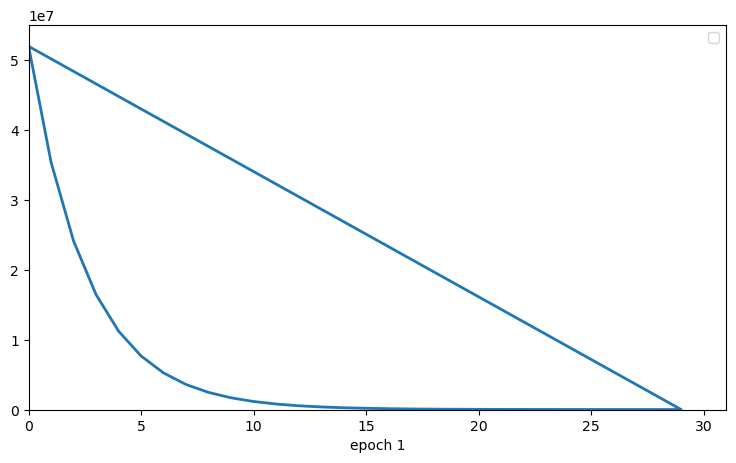

In [40]:
# Cost function
# creating a blank window 
# for the animation 
num_epochs = list(range(0,30))
fig = plt.figure(figsize=(9, 5)) 
axis = plt.axes(xlim =(0, 31), ylim =(0, 55000000)) 
axis.legend()  
line, = axis.plot([], [], lw = 2) 
  
xdata, ydata = [], [] 
  
# animation function 
def animate(i): 
    label = 'epoch {0}'.format(i + 1)
    xdata.append(num_epochs[i]) 
    ydata.append(all_cost[i]) 
    line.set_data(xdata, ydata) 
    axis.set_xlabel(label)
      
    return line, 
  
# calling the animation function     
anim = animation.FuncAnimation(fig, animate, frames = 30,repeat=False, interval = 500)

f = r"animation5.gif" 
writergif = animation.PillowWriter(fps=2) 
anim.save(f, writer=writergif)

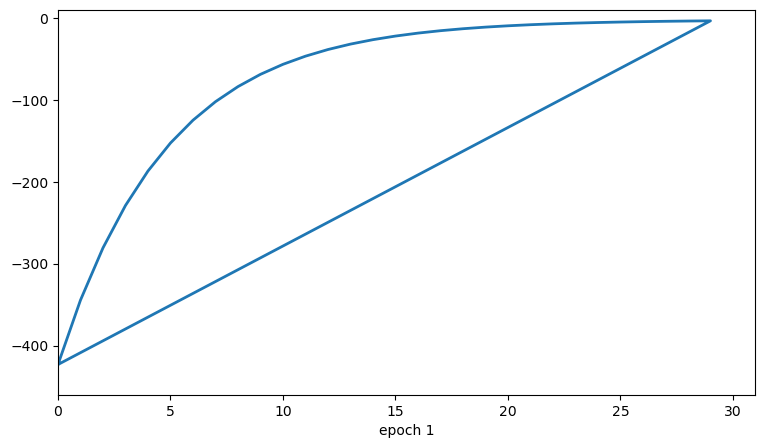

In [41]:
# intercept graph
num_epochs = list(range(0,30))
fig = plt.figure(figsize=(9,5)) 
axis = plt.axes(xlim =(0, 31), ylim =(-460, 10)) 
  
line, = axis.plot([], [], lw = 2) 
  
xdata, ydata = [], [] 
  
# animation function 
def animate(i): 
    label = 'epoch {0}'.format(i + 1)
    xdata.append(num_epochs[i]) 
    ydata.append(all_b[i]) 
    line.set_data(xdata, ydata) 
    axis.set_xlabel(label)
      
    return line, 
  
# calling the animation function     
anim = animation.FuncAnimation(fig, animate, frames = 30,repeat=False, interval = 500)

f = r"animation6.gif" 
writergif = animation.PillowWriter(fps=2) 
anim.save(f, writer=writergif)

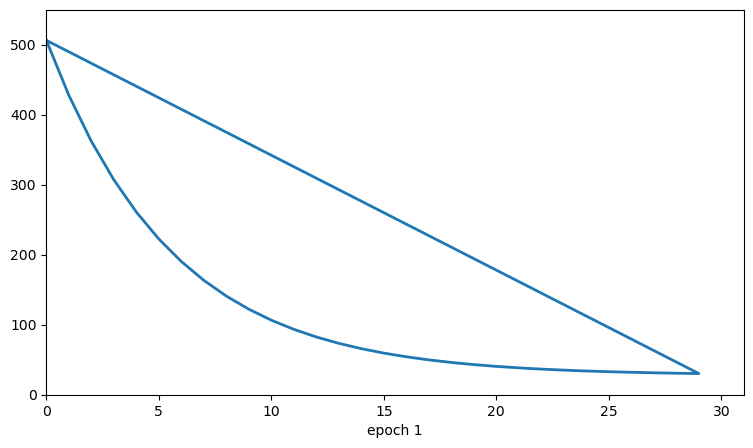

In [42]:
# intercept graph
num_epochs = list(range(0,30))
fig = plt.figure(figsize=(9,5)) 
axis = plt.axes(xlim =(0, 31), ylim =(0, 550)) 
  
line, = axis.plot([], [], lw = 2) 
  
xdata, ydata = [], [] 
  
# animation function 
def animate(i): 
    label = 'epoch {0}'.format(i + 1)
    xdata.append(num_epochs[i]) 
    ydata.append(all_m[i]) 
    line.set_data(xdata, ydata) 
    axis.set_xlabel(label)
      
    return line, 
  
# calling the animation function     
anim = animation.FuncAnimation(fig, animate, frames = 30,repeat=False, interval = 500)

f = r"animation7.gif" 
writergif = animation.PillowWriter(fps=2) 
anim.save(f, writer=writergif)